In [1]:
#import important libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
#dropping unneccesary features
df.drop(['Name','CustomerID'],axis=1,inplace=True)

In [7]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [8]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [9]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [10]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [11]:
#encoding location column using map function
df['Location']=df['Location'].map({"Houston":0,"Los Angeles":1, "Miami":2, "Chicago":3, "New York":4})

In [12]:
#encoding Gender column using map function
df['Gender']=df['Gender'].map({"Female":0, "Male":1})

In [13]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,1,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,1,5,85.47,460,0
3,36,0,2,3,97.94,297,1
4,46,0,2,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,0,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,3,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


<Axes: >

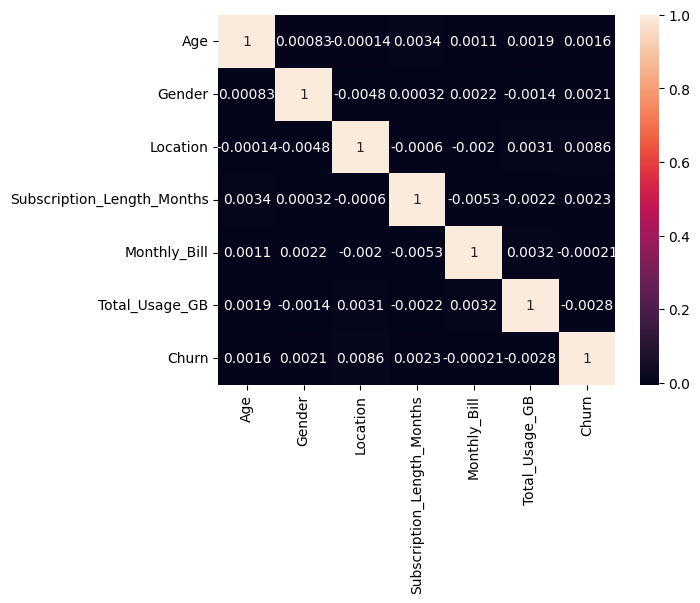

In [14]:
#visualizing correlation between the features
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'insights from Location column in the dataset')

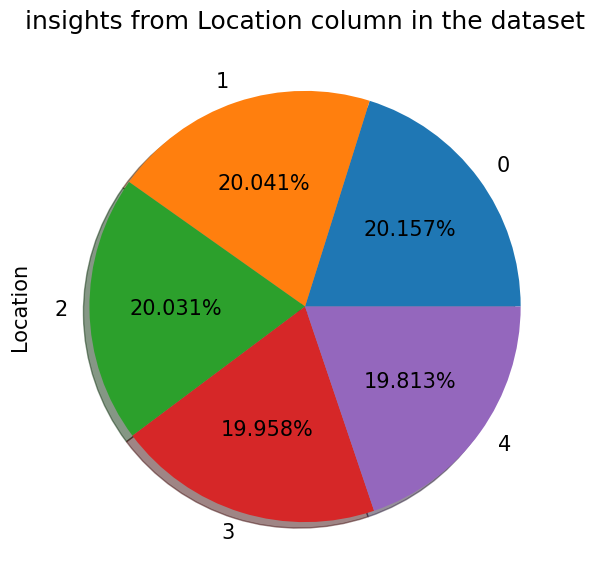

In [68]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(7,7))
df["Location"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from Location column in the dataset")

Text(0.5, 1.0, 'insights from Gender column in the dataset')

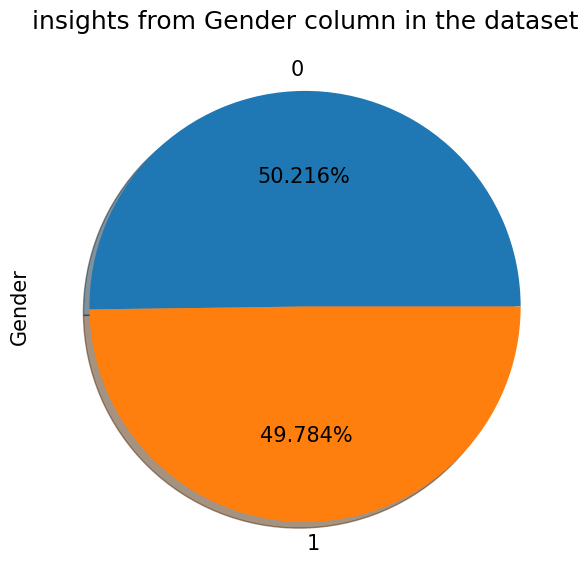

In [69]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(7,7))
df["Gender"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from Gender column in the dataset")

Text(0.5, 1.0, 'insights from Churn column in the dataset')

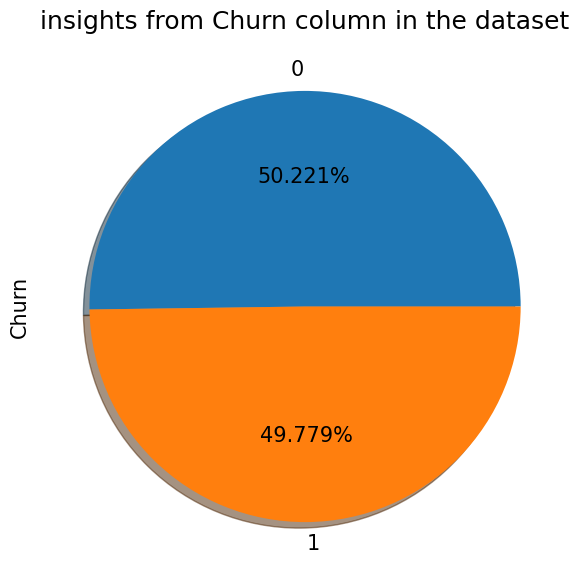

In [70]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(7,7))
df["Churn"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from Churn column in the dataset")

Text(0.5, 1.0, 'insights from Subscription_Length_Months column in the dataset')

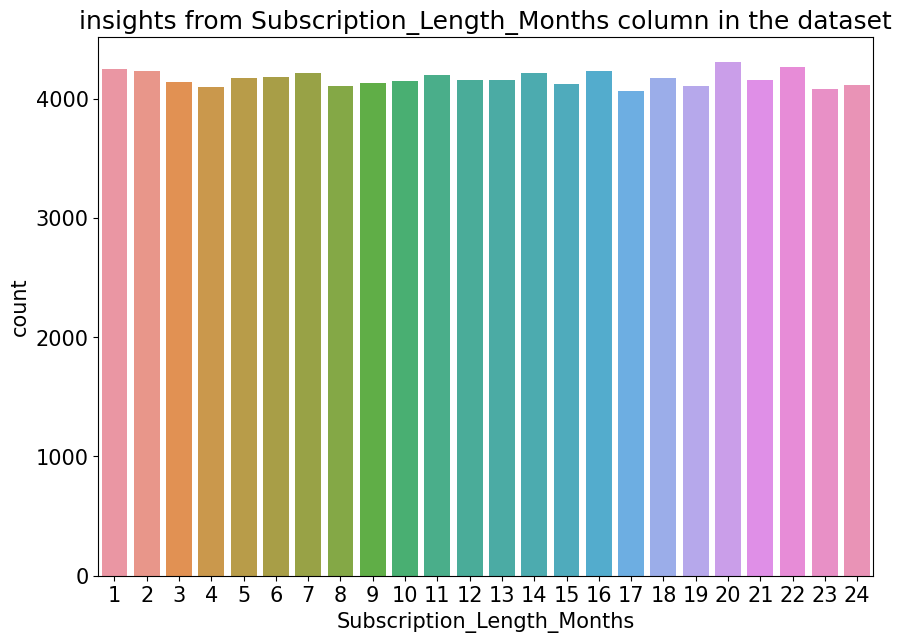

In [71]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
sns.countplot(x='Subscription_Length_Months', data=df)
plt.title("insights from Subscription_Length_Months column in the dataset")

Text(0.5, 1.0, 'insights from Age column in the dataset')

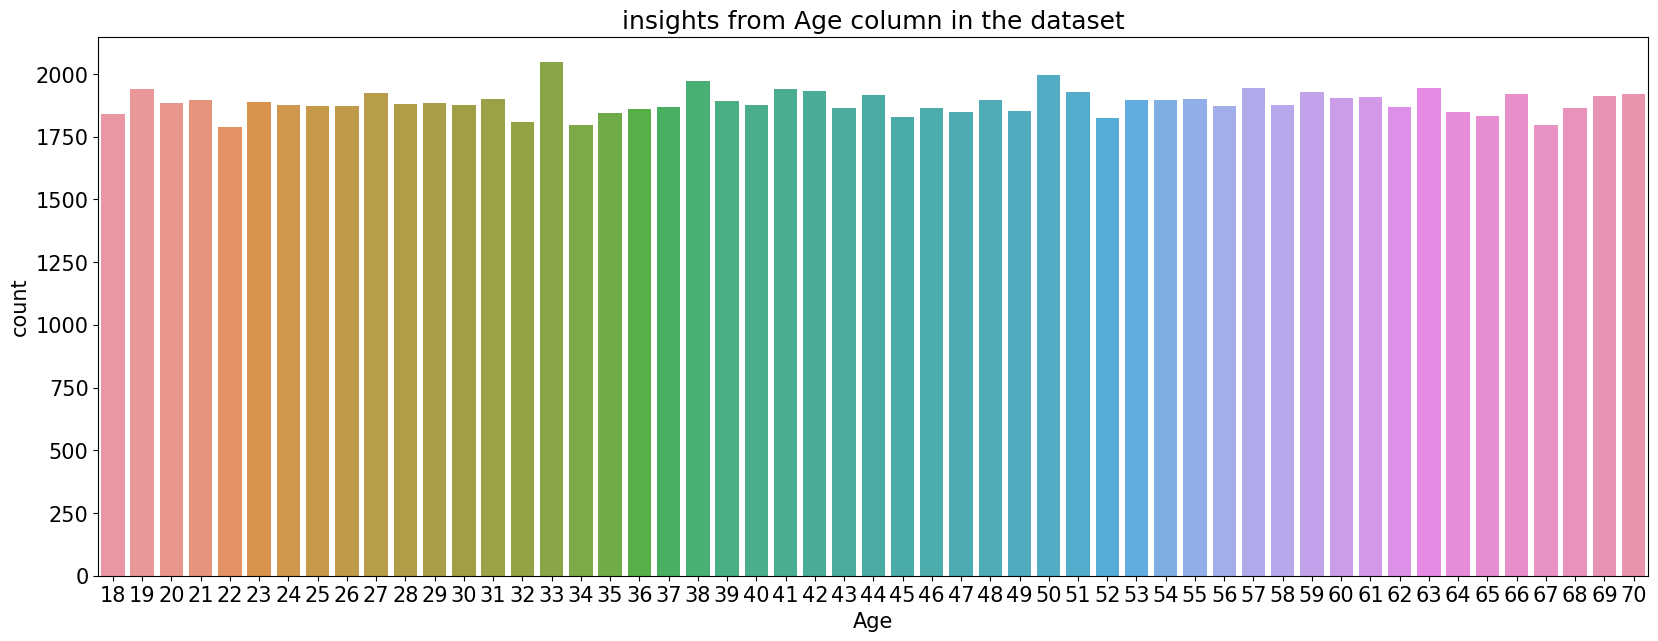

In [72]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,7))
sns.countplot(x='Age', data=df)
plt.title("insights from Age column in the dataset")

In [32]:
#importing important libraries for model building and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(columns="Churn")
y = df["Churn"]

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
X_train

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
80630,30,0,3,24,31.76,113
62017,46,0,2,1,88.37,159
5005,28,0,4,19,68.06,268
56849,31,0,3,9,66.40,327
42434,28,0,3,4,98.35,315
...,...,...,...,...,...,...
50057,52,0,0,8,58.76,288
98047,33,0,1,11,77.71,244
5192,48,0,2,22,62.49,73
77708,37,1,2,6,87.78,318


In [36]:
#standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
#different ML algorithms
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XGBC = XGBClassifier()

In [37]:
#checking best ML Algorithm for best model prediction
li = [LR,DTC,XGBC,RFC]
q = {}
for i in li:
    i.fit(X_train_scaled,y_train)
    ypred = i.predict(X_test_scaled)
    print(i,":",accuracy_score(y_test,ypred)*100)
    q.update({str(i):i.score(X_test_scaled,y_test)*100})

LogisticRegression() : 50.21666666666667
DecisionTreeClassifier() : 49.53333333333333
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 49.82
RandomForestClassifier() : 50.129999999999995


MODEL TRAINING USING DEEP LEARNING ALGORITHMS

In [38]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [46]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.9 MB/s eta 0:00:00


In [47]:
from kerastuner.tuners import RandomSearch

<ipython-input-47-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [48]:
#function for model building
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=256, kernel_initializer="he_uniform",activation="relu",input_dim=6))

  model.add(Dense(units=128, kernel_initializer="he_uniform", activation="relu"))

  model.add(Dense(units=1, activation="relu"))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","adagrad","adadelta","rmsprop"])
  model.compile(optimizer=optimizer, loss="binary_crossentropy",metrics=['accuracy'])

  return model

In [50]:
tuner=RandomSearch(build_model, objective="val_accuracy", directory='project1',project_name='cust_churn')

In [51]:

tuner.search(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=10)

Trial 5 Complete [00h 02m 23s]
val_accuracy: 0.4963333308696747

Best val_accuracy So Far: 0.5041000247001648
Total elapsed time: 00h 10m 12s


In [52]:
#finding best hyperparameter
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adagrad'}

In [53]:
#saving model with best model
bestmodel=tuner.get_best_models(num_models=1)[0]

In [54]:

bestmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34817 (136.00 KB)
Trainable params: 34817 (136.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
#model training
modell=bestmodel.fit(X_train_scaled,y_train,batch_size=10,epochs=10,validation_split=0.25)

Epoch 1/10
5250/5250 [==============================] - 23s 4ms/step - loss: 0.7205 - accuracy: 0.5064 - val_loss: 0.7242 - val_accuracy: 0.5018
Epoch 2/10
5250/5250 [==============================] - 21s 4ms/step - loss: 0.7198 - accuracy: 0.5066 - val_loss: 0.7235 - val_accuracy: 0.5023
Epoch 3/10
5250/5250 [==============================] - 19s 4ms/step - loss: 0.7192 - accuracy: 0.5058 - val_loss: 0.7230 - val_accuracy: 0.5006
Epoch 4/10
5250/5250 [==============================] - 19s 4ms/step - loss: 0.7186 - accuracy: 0.5074 - val_loss: 0.7233 - val_accuracy: 0.5007
Epoch 5/10
5250/5250 [==============================] - 21s 4ms/step - loss: 0.7181 - accuracy: 0.5070 - val_loss: 0.7220 - val_accuracy: 0.5022
Epoch 6/10
5250/5250 [==============================] - 19s 4ms/step - loss: 0.7176 - accuracy: 0.5070 - val_loss: 0.7221 - val_accuracy: 0.4998
Epoch 7/10
5250/5250 [==============================] - 19s 4ms/step - loss: 0.7171 - accuracy: 0.5075 - val_loss: 0.7213 - val_ac

In [59]:

modell.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [60]:
#model accuracy
modell.history['accuracy']

[0.5063619017601013,
 0.5065904855728149,
 0.5057904720306396,
 0.5074095129966736,
 0.5069524049758911,
 0.5070475935935974,
 0.5075428485870361,
 0.5081523656845093,
 0.5080381035804749,
 0.5091428756713867]

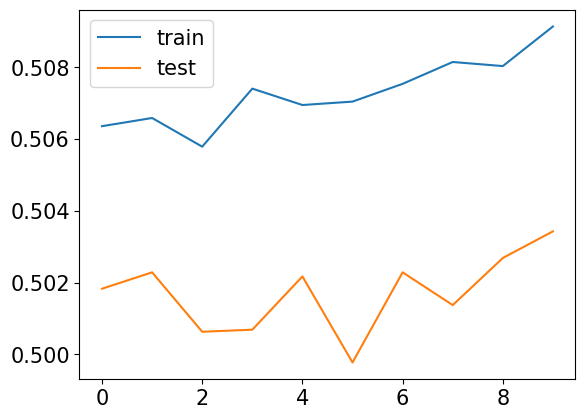

In [61]:
#test and train accuracy are increasing
plt.plot(modell.history['accuracy'])
plt.plot(modell.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()



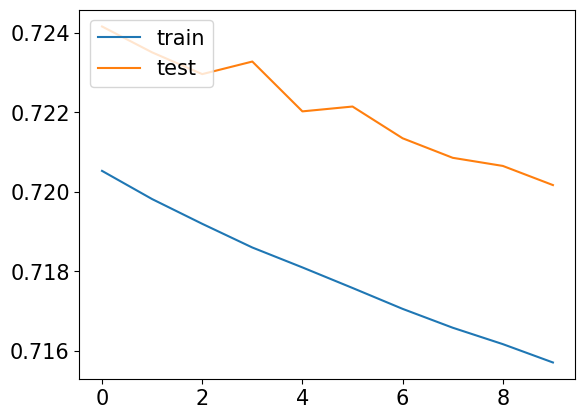

In [62]:
#test and train loss reducing linearly
plt.plot(modell.history['loss'])
plt.plot(modell.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [63]:
y_pred=classifier.predict(X_test_scaled)

938/938 [==============================] - 3s 3ms/step


In [64]:
y_pred=y_pred>0.5

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
cm=confusion_matrix(y_test,y_pred)

In [67]:
accuracy_score(y_test,y_pred)

0.5037